C:\Users\user\AppData\Local\Temp\ipykernel_10584\1015529296.py:83: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110, )


Accuracy Logistic Regression: 0.9705882352941176


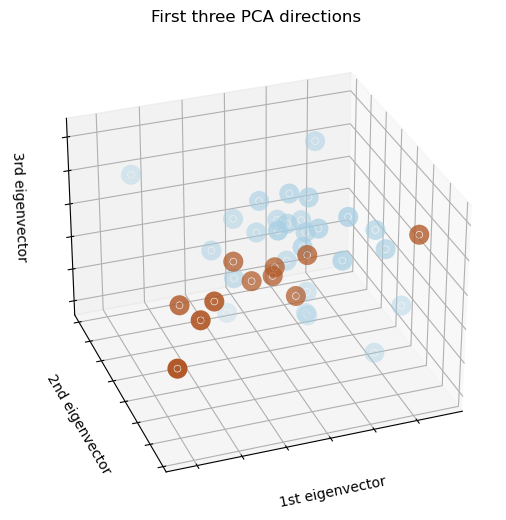

In [8]:
# importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

dataset_actual = pd.read_csv("../Desktop/actual.csv")  # importing  the dataset
dataset_train = pd.read_csv("../Desktop/data_set_train.csv")  # importing  the dataset
dataset_test = pd.read_csv("../Desktop/data_set_test.csv")  # importing  the dataset
dataset_actual = dataset_actual.replace({'ALL' : 0, 'AML' : 1})
labels = ['ALL', 'AML']

# remove 'call' columns from training and testing data
dataset_train1 = [col for col in dataset_train.columns if "call" not in col]
dataset_test1 = [col for col in dataset_test.columns if "call" not in col]

X_train1 = dataset_train[dataset_train1]
X_test1 = dataset_test[dataset_test1]

train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8',
                        '9', '10',
                        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
                        '25',
                        '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

X_train1 = X_train1.reindex(columns=train_columns_titles)

test_columns_titles = ['Gene Description', 'Gene Accession Number', '39', '40', '41', '42', '43', '44',
                        '45', '46',
                        '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
                        '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

X_test1 = X_test1.reindex(columns=test_columns_titles)

X_train = X_train1.T
X_test = X_test1.T

# Clean up the column names for training and testing data
X_train.columns = X_train.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Clean up the column names for Testing data
X_test.columns = X_test.iloc[1]
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Subset the first 38 patients cancer types
X_train = X_train.reset_index(drop=True)
y_train = dataset_actual[dataset_actual.patient <= 38].reset_index(drop=True)

# Subset the rest for testing
X_test = X_test.reset_index(drop=True)
y_test = dataset_actual[dataset_actual.patient > 38].reset_index(drop=True)

# Convert from integer to float
X_train_fl = X_train.astype(float, 64)
X_test_fl = X_test.astype(float, 64)

# performing preprocessing part
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
X_test_scl = scaler.transform(X_test_fl)

# applying PCA function on training
# and testing set of X component
pca = PCA()
pca.fit_transform(X_train)

# define the Principal Component Analysis model
pca3 = PCA(n_components=3).fit(X_train)

# get the optimal train components
X_train_reduced = pca3.transform(X_train)


plt.clf()
fig = plt.figure(1, figsize=(10, 6))
ax = Axes3D(fig, elev=-150, azim=110, )
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c=y_train.iloc[:, 1],
            cmap=plt.cm.Paired, linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

# fitting Logistic Regression To the training set
LR = LogisticRegression()
LR.fit(X_train, y_train.iloc[:, 1])

# predicting the test set result using
# predict function under LogisticRegression
pred1 = LR.predict(X_test)
LR_score = LR.score(X_test, y_test.iloc[:, 1])
LR.score(X_test, y_test.iloc[:, 1])
print("Accuracy Logistic Regression:", metrics.accuracy_score(y_test.iloc[:, 1], pred1))

Text(0.5, 1.0, '2D Transformation of the Above Graph ')

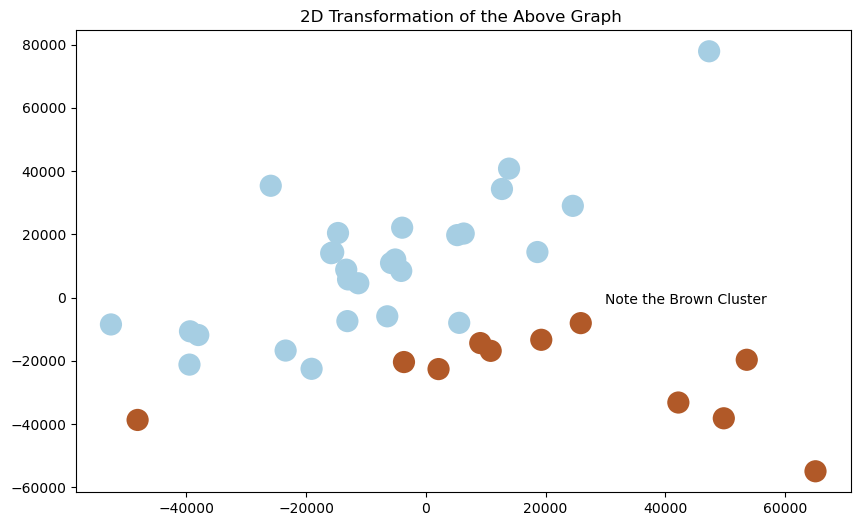

In [5]:
fig = plt.figure(1, figsize = (10, 6))
plt.scatter(X_train_reduced[:, 0],  X_train_reduced[:, 1], c = y_train.iloc[:,1], cmap = plt.cm.Paired, linewidths=10)
plt.annotate('Note the Brown Cluster', xy = (30000,-2000))
plt.title("2D Transformation of the Above Graph ")

d:\data\_devtools\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-means accuracy: 0.765


[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'AML')]

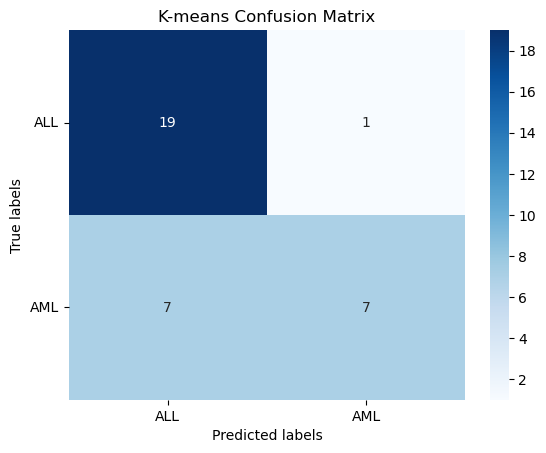

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_scl)
km_pred = kmeans.predict(X_test_scl)

print('K-means accuracy:', round(metrics.accuracy_score(y_test.iloc[:,1], km_pred), 3))

cm_km = confusion_matrix(y_test.iloc[:,1], km_pred)

ax = plt.subplot()
sns.heatmap(cm_km, annot=True, ax = ax, fmt='g', cmap='Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('K-means Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

Naive Bayes accuracy: 0.912


[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'AML')]

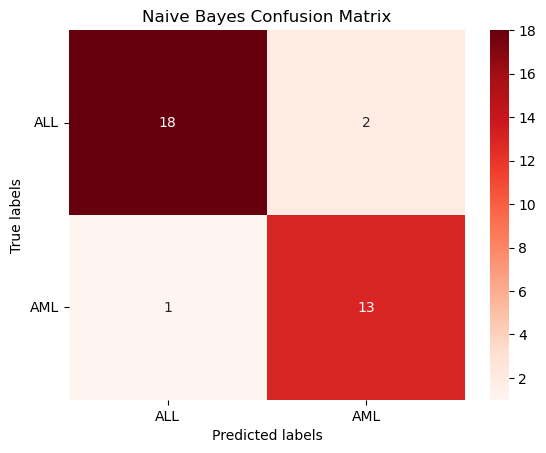

In [7]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian classifier
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.iloc[:,1])

nb_pred = nb_model.predict(X_test)

print('Naive Bayes accuracy:', round(metrics.accuracy_score(y_test.iloc[:,1], nb_pred), 3))

cm_nb =  confusion_matrix(y_test.iloc[:,1], nb_pred)

ax = plt.subplot()
sns.heatmap(cm_nb, annot=True, ax = ax, fmt='g', cmap='Reds') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)